In [245]:
import pandas as pd
import numpy as np
from collections import Counter
import pandas_flavor as pfl
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA

In [235]:
#setting display options 

pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)

In [152]:
zillow_df = pd.read_csv('../raw_data/zillow_data.csv')

In [234]:
zillow_regiondf = zillow_df[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName']]
zillow_regiondf.head(2)

,RegionID,RegionName,City,State,Metro,CountyName
0,84654,60657,Chicago,IL,Chicago,Cook
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin


In [192]:
#transposing zillow dataframe 
zillow_transpose_df = zillow_df.T

#changing the name of columns to RegionName or zipcodes
zillow_transpose_df.columns = zillow_transpose_df.iloc[1].tolist()

#cutting out rows not necessary for our data
zillow_cleandf = zillow_transpose_df.iloc[7:]

#converting index to datetimeindex
zillow_cleandf.index = pd.to_datetime(zillow_cleandf.index, format = '%Y-%m')

#changing name of index
zillow_cleandf.index.name = 'Date_index'

#casting all columns to numeric
zillow_cleandf = zillow_cleandf.apply(pd.to_numeric)

In [236]:
zillow_cleandf.head(2)

,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,11226,32162,11375,11235,37013,90250,60647,37211,78660,60618,10011,10128,77573,77584,28269,79912,78572,94565,30349,20002,90046,78130,78613,20009,75052,10462,10456,37042,77429,63376,60613,77479,30044,73099,77036,77433,10463,11230,60629,11209,60625,30043,75034,11212,75287,28277,85032,7030,11214,21234,33160,78521,23464,77077,94501,30096,78704,98052,77379,75243,11221,78245,11229,8701,60619,90034,94110,78666,30024,60610,44107,75067,33025,33411,33139,11377,90044,48197,2169,23462,90805,66062,44035,95630,90650,11234,92683,85710,78745,11355,10314,30281,32210,37075,94558,60611,11215,90026,85225,91910,87111,28027,6010,78240,87114,89108,85308,11211,17603,93722,80134,48180,85281,78577,94533,15601,95608,43081,44060,80013,33024,20906,33009,90066,43123,97229,76028,91709,11385,85364,11373,14850,65807,98012,77459,92677,95823,33908,44256,2148,60620,27410,45011,76063,33647,92804,11238,60634,8753,65203,47906,98103,92345,75228,92126,90019,43130,27406,60016,46307,76244,28314,27610,89121,29732,75056,30040,30188,79938,92336,99301,20011,77095,91911,77845,92503,94536,7002,27587,21740,11233,7302,90280,22191,19111,89117,87120,43230,40475,46227,11236,91730,23320,74012,90201,92592,32244,21117,92109,34787,77450,92101,32822,30080,7093,60626,90004,28078,34135,90706,48103,30062,33186,30052,30041,75217,33012,30331,11372,32256,34711,60649,27834,92335,37130,23454,38401,92021,48185,93065,91342,44130,95747,32218,95123,43026,20019,22193,45840,80634,...,14804,44093,1011,6027,50233,62218,84328,56382,67001,67428,3084,3230,13026,42436,45889,46985,58059,22713,46165,79355,48761,61747,3777,18915,55924,3583,47948,12726,23433,54921,31829,98645,45881,62048,61841,43540,57018,49318,8006,1092,11958,55324,55722,62338,31097,43432,68523,2812,37688,80827,97886,56569,12959,37118,48760,67437,12513,10518,12423,14008,44449,13807,11739,21645,8328,24325,59846,1245,3846,56570,72845,13028,61870,3816,1008,58042,38560,66956,6796,53911,45339,3745,21521,46764,62545,33855,13334,61912,13061,61230,15015,46913,96141,3854,10964,14728,43456,61038,14506,47541,19964,62539,24530,38362,62440,98358,3268,80819,99123,92339,1366,62094,67070,3450,37141,54007,20609,65046,12836,61847,23039,1026,24059,3241,38361,56181,79366,33924,49102,50530,95629,60512,61420,93664,3590,83803,61859,92333,55753,37369,50162,20693,61931,49322,49724,66023,98351,10501,16836,31561,43013,56041,1368,53550,46987,56176,56314,61488,95636,8317,57035,12824,21662,3853,3605,43445,50106,61733,94970,21671,49638,87540,12175,49716,8241,3740,3875,21869,56010,17006,21657,6090,52728,55065,25843,20674,97011,68633,98279,56578,12153,61572,15083,93529,52341,49725,56120,98940,45326,91008,4066,84726,80515,98925,49718,43525,80428,96148,28611,83846,93517,28775,80456,1255,85611,3457,3284,95728,28757,95497,12156,97149,77457,80481,20625,20618,80510,49710,1270,12480,83821,29915,49768,3215,28039,97733,92322,3812,89413,92341,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-04-01,334200.0,235700.0,210400.0,498100.0,77300.0,95000.0,152900.0,216500.0,95400.0,766000.0,162000.0,101000.0,252400.0,190500.0,112400.0,152500.0,122700.0,97900.0,138900.0,142600.0,NaN,3676700.0,141400.0,138500.0,126100.0,119700.0,69900.0,139200.0,90900.0,94300.0,340600.0,123900.0,169600.0,178800.0,100800.0,154300.0,NaN,72000.0,149600.0,98200.0,297900.0,189800.0,111400.0,83100.0,120400.0,147300.0,180100.0,230100.0,93400.0,255700.0,148900.0,135200.0,285200.0,125000.0,184400.0,183900.0,95400.0,301600.0,191000.0,99000.0,3373

* **Our data is monthly and resampling the data yearly will show us the average change in housing prices**

In [ ]:
#resampling yearly average data
zillow_yr_avg = zillow_cleandf.resample('YS').mean()

In [232]:
zillow_yr_avg.head()

,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,11226,32162,11375,11235,37013,90250,60647,37211,78660,60618,10011,10128,77573,77584,28269,79912,78572,94565,30349,20002,90046,78130,78613,20009,75052,10462,10456,37042,77429,63376,60613,77479,30044,73099,77036,77433,10463,11230,60629,11209,60625,30043,75034,11212,75287,28277,85032,7030,11214,21234,33160,78521,23464,77077,94501,30096,78704,98052,77379,75243,11221,78245,11229,8701,60619,90034,94110,78666,30024,60610,44107,75067,33025,33411,33139,11377,90044,48197,2169,23462,90805,66062,44035,95630,90650,11234,92683,85710,78745,11355,10314,30281,32210,37075,94558,60611,11215,90026,85225,91910,87111,28027,6010,78240,87114,89108,85308,11211,17603,93722,80134,48180,85281,78577,94533,15601,95608,43081,44060,80013,33024,20906,33009,90066,43123,97229,76028,91709,11385,85364,11373,14850,65807,98012,77459,92677,95823,33908,44256,2148,60620,27410,45011,76063,33647,92804,11238,60634,8753,65203,47906,98103,92345,75228,92126,90019,43130,27406,60016,46307,76244,28314,27610,89121,29732,75056,30040,30188,79938,92336,99301,20011,77095,91911,77845,92503,94536,7002,27587,21740,11233,7302,90280,22191,19111,89117,87120,43230,40475,46227,11236,91730,23320,74012,90201,92592,32244,21117,92109,34787,77450,92101,32822,30080,7093,60626,90004,28078,34135,90706,48103,30062,33186,30052,30041,75217,33012,30331,11372,32256,34711,60649,27834,92335,37130,23454,38401,92021,48185,93065,91342,44130,95747,32218,95123,43026,20019,22193,45840,80634,...,14804,44093,1011,6027,50233,62218,84328,56382,67001,67428,3084,3230,13026,42436,45889,46985,58059,22713,46165,79355,48761,61747,3777,18915,55924,3583,47948,12726,23433,54921,31829,98645,45881,62048,61841,43540,57018,49318,8006,1092,11958,55324,55722,62338,31097,43432,68523,2812,37688,80827,97886,56569,12959,37118,48760,67437,12513,10518,12423,14008,44449,13807,11739,21645,8328,24325,59846,1245,3846,56570,72845,13028,61870,3816,1008,58042,38560,66956,6796,53911,45339,3745,21521,46764,62545,33855,13334,61912,13061,61230,15015,46913,96141,3854,10964,14728,43456,61038,14506,47541,19964,62539,24530,38362,62440,98358,3268,80819,99123,92339,1366,62094,67070,3450,37141,54007,20609,65046,12836,61847,23039,1026,24059,3241,38361,56181,79366,33924,49102,50530,95629,60512,61420,93664,3590,83803,61859,92333,55753,37369,50162,20693,61931,49322,49724,66023,98351,10501,16836,31561,43013,56041,1368,53550,46987,56176,56314,61488,95636,8317,57035,12824,21662,3853,3605,43445,50106,61733,94970,21671,49638,87540,12175,49716,8241,3740,3875,21869,56010,17006,21657,6090,52728,55065,25843,20674,97011,68633,98279,56578,12153,61572,15083,93529,52341,49725,56120,98940,45326,91008,4066,84726,80515,98925,49718,43525,80428,96148,28611,83846,93517,28775,80456,1255,85611,3457,3284,95728,28757,95497,12156,97149,77457,80481,20625,20618,80510,49710,1270,12480,83821,29915,49768,3215,28039,97733,92322,3812,89413,92341,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-01-01,338444.444444,230988.888889,206655.555556,503444.444444,77455.555556,95733.333333,152211.111111,217266.666667,96255.555556,7.883444e+05,163833.333333,99800.000000,251422.222222,192633.333333,114000.000000,152644.444444,122033.333333,98888.888889,138988.888889,141988.888889,NaN,3.791967e+06,140822.222222,140955.555556,127877.777778,119966.666667,68888.888889,135711.111111,91255.555556,93711.111111,347055.555556,123900.000000,169522.222222,180466.666667,101333.333333,154455.555556,NaN,75222.222222,147344.444444,100588.

* **If a zip code is missing above 25 percent (6 data points), then it was out of considerations**

In [284]:
#making a key and value combination of columns and the number of null values they have 

num_nan = {}
for col in zillow_yr_avg:
    num_nan[col]=zillow_yr_avg[col].isnull().sum()

print('Shape of data:', zillow_yr_avg.shape)

Shape of data: (23, 14723)


In [287]:
#selecting columns with less than 25 percent missing data

col = []

for colum,nan in sorted(num_nan.items(), key = lambda x:x[1], reverse=True):
    if nan < 6:
        col.append(colum)   

In [288]:
#Taking out missing data

zillow_yr_clean = zillow_yr_avg[col]

print('Shape of data:', zillow_yr_clean.shape)


Shape of data: (23, 13687)


In [297]:
zillow_yr_clean.head()

,23192,23015,23047,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,11226,32162,11375,11235,37013,90250,60647,37211,78660,60618,10128,77573,77584,28269,79912,78572,94565,30349,20002,90046,78130,78613,20009,75052,10462,37042,77429,63376,60613,77479,30044,73099,77036,77433,10463,11230,60629,11209,60625,30043,75034,11212,75287,28277,85032,7030,11214,21234,33160,78521,23464,77077,94501,30096,78704,98052,77379,75243,11221,78245,11229,8701,60619,90034,94110,78666,30024,60610,44107,75067,33025,33411,33139,11377,90044,48197,2169,23462,90805,66062,44035,95630,90650,11234,92683,85710,78745,11355,10314,30281,32210,37075,94558,11215,90026,85225,91910,87111,28027,6010,78240,87114,89108,85308,11211,17603,93722,80134,48180,85281,78577,94533,15601,95608,43081,44060,80013,33024,20906,33009,90066,43123,97229,76028,91709,11385,85364,11373,14850,65807,98012,77459,92677,95823,33908,44256,2148,60620,27410,45011,76063,33647,92804,60634,8753,65203,47906,98103,92345,75228,92126,90019,43130,27406,60016,46307,76244,28314,27610,89121,29732,75056,30040,30188,79938,92336,99301,20011,77095,91911,77845,92503,94536,7002,27587,21740,11233,7302,90280,22191,19111,89117,87120,43230,40475,46227,11236,91730,23320,74012,90201,92592,32244,21117,92109,34787,77450,92101,32822,30080,7093,60626,90004,28078,34135,90706,48103,30062,33186,30052,30041,75217,33012,30331,11372,32256,34711,60649,92335,37130,23454,38401,92021,48185,93065,91342,44130,95747,32218,95123,43026,20019,22193,45840,80634,2155,92627,...,61741,47451,47649,83813,38379,47940,50056,47941,55710,80105,16738,14418,55910,3442,12029,47166,49625,1354,3464,62573,3227,48897,49814,55991,1098,25202,12485,42441,47234,61776,54864,61232,62638,20779,64444,53577,61728,8319,15673,96142,14804,44093,1011,6027,62218,84328,56382,67001,3084,3230,13026,42436,45889,46985,22713,46165,48761,61747,3777,18915,55924,3583,12726,23433,54921,31829,98645,45881,62048,61841,43540,49318,8006,1092,11958,55324,55722,62338,43432,68523,2812,37688,80827,56569,12959,37118,12513,10518,12423,14008,13807,11739,21645,8328,59846,1245,3846,56570,13028,61870,3816,1008,38560,6796,53911,45339,3745,21521,46764,62545,13334,61912,13061,61230,15015,46913,96141,3854,10964,14728,43456,61038,14506,47541,62539,24530,38362,98358,3268,80819,99123,92339,1366,62094,3450,54007,20609,65046,12836,61847,23039,1026,24059,3241,38361,56181,79366,33924,49102,50530,95629,60512,61420,3590,83803,61859,92333,55753,37369,50162,20693,61931,49322,49724,98351,10501,16836,1368,53550,46987,56176,56314,61488,95636,8317,12824,21662,3853,3605,43445,50106,61733,94970,21671,87540,12175,49716,8241,3740,3875,21869,17006,21657,6090,52728,55065,25843,20674,97011,98279,56578,12153,61572,15083,52341,49725,98940,45326,91008,4066,80515,98925,43525,80428,96148,28611,93517,28775,80456,1255,3457,3284,95728,28757,95497,12156,97149,77457,80481,20625,20618,80510,49710,1270,12480,29915,92322,3812,89413,92341,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-01-01,NaN,NaN,NaN,338444.444444,230988.888889,206655.555556,503444.444444,77455.555556,95733.333333,152211.111111,217266.666667,96255.555556,7.883444e+05,163833.333333,99800.000000,251422.222222,192633.333333,114000.000000,152644.444444,122033.333333,98888.888889,138988.888889,141988.888889,3.791967e+06,140822.222222,140955.555556,127877.777778,119966.666667,68888.888889,135711.111111,91255.555556,93711.111111,347055.555556,123900.000000,169522.222222,180466.666667,101333.333333,154455.555556,75222.222222,147344.444444,100588.88

In [291]:
#yearly return ie yearly profit margin of housing 

zillow_yr_returns = zillow_yr_clean.pct_change()

In [306]:
#zip codes key and average yearly profit margin per housing
yr_returns = {}
for i in zillow_yr_returns:
    yr_returns[i] = zillow_yr_returns[i].mean()

sorted_yr_returns = sorted(yr_returns.items(), key = lambda x: x[1], reverse=True)
s

In [358]:
top_five = sorted_yr_returns[:5]
bottom_one = sorted_yr_returns[-1]
cols = [11211, 11222, 11216, 7302, 11930, 48503]

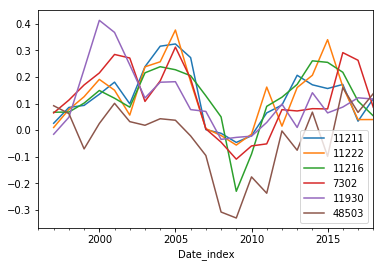

In [359]:
for zipcode in cols:
    zillow_yr_returns[zipcode].plot()
    plt.legend()

In [343]:
dataframe_list = []
for col in cols:
    dataframe_list.append(zillow_regiondf[zillow_regiondf['RegionName']==col])   

In [364]:
dataframe_list

[     RegionID  RegionName      City State     Metro CountyName
 117     62022       11211  New York    NY  New York      Kings,
       RegionID  RegionName      City State     Metro CountyName
 1155     62033       11222  New York    NY  New York      Kings,
      RegionID  RegionName      City State     Metro CountyName
 475     62027       11216  New York    NY  New York      Kings,
      RegionID  RegionName         City State     Metro CountyName
 191     60639        7302  Jersey City    NJ  New York     Hudson,
        RegionID  RegionName        City State     Metro CountyName
 11728     62281       11930  Amagansett    NY  New York    Suffolk,
       RegionID  RegionName   City State  Metro CountyName
 4381     79244       48503  Flint    MI  Flint    Genesee]

In [ ]:
## chicago county 0
chicago_zero = chicago_longdf[[0]]
chicago_zero.columns = chicago_zero.columns.astype(str)
chicago_zero.columns = ['price']
chicago_zero.head(2)

In [ ]:
plt.plot(chicago_zero)
plt.title('Chicago county housing prices over 20 year period')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

In [ ]:
chicago_longdf.pct_change().describe()

In [ ]:
chicago_longdf.pct_change().describe

In [ ]:
#price returns for county 'zero'
price_returns = chicago_zero[['price']].pct_change()
price_returns.head(2)

In [ ]:
#lagged value of housing price and original price are trend following
chicago_zero['price'].autocorr()

In [ ]:
plot_acf(chicago_zero['price'], lags=60);

In [ ]:
#stationarity
plt.plot(np.log(chicago_zero['price']).diff());

In [ ]:
decomposition = sm.tsa.seasonal_decompose(chicago_zero_df.diff(6).dropna(), model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
adfuller(chicago_zero_df.diff(1).dropna()['price'])[1]

In [ ]:
bic_list = []
for i in range(1,9):
    bic_list.append(ARMA(chicago_zero_df.diff(1).dropna().values, (1,i)).fit().bic)

In [ ]:
plt.plot([i for i in range(1,9)], bic_list)
plt.ylabel('BIC')
plt.xlabel('q values');

In [ ]:
chicago_zero_df.diff(1).dropna().index

In [ ]:
model = ARMA(chicago_zero_df.diff(1).dropna().values, (1,3)).fit()